# 3. Similitud entre productos
---
## Descripción

Un desafío constante en MELI es el de poder agrupar productos similares utilizando algunos atributos de estos como pueden ser el título, la descripción o su imagen.
Para este desafío tenemos un dataset “items_titles.csv” que tiene títulos de 30 mil productos de 3 categorías diferentes de Mercado Libre Brasil

## Entregable
El objetivo del desafío es poder generar una Jupyter notebook que determine cuán similares son dos títulos del dataset “item_titles_test.csv” generando como output un listado de la forma

|ITE_ITEM_TITLE |ITE_ITEM_TITLE     | Score Similitud (0,1)|
|:-------------:|:-----------------:|:--------------------:|
|Zapatillas Nike |Zapatillas Adidas | 0,5                  |
|Zapatillas Nike |Zapatillas Nike   | 1                    |

donde ordenando por score de similitud podamos encontrar los pares de productos más similares en nuestro dataset de test.

In [1]:
import re
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sentence_transformers import SentenceTransformer, util
import torch
from utils import encode_titles, get_top_k_similarity
MODEL_NAME = "intfloat/multilingual-e5-small"

In [2]:
# Load Data
df = pd.read_csv('data/items_titles.csv')

In [3]:
# Download Selected model
model = SentenceTransformer(MODEL_NAME)

In [4]:
# Vectorize titles 
corpus_embeddings, corpus = encode_titles(df, model)

In [5]:
def dropdown_corpus_eventhandler(corpus_selector):#: widgets, df:pd.DataFrame, output_corpus, model: SentenceTransformer,corpus: list, corpus_embeddings: torch.Tensor, top_k:int=5):
    '''
    Eventhandler setup to display corpus as dropdown widget, when title is selected display dataframe with top_k results of similarity.
    Input:
        corpus_selector: 
        query: string with the target text to be searched
        model: Pre-trained and pre-loaded model to vectorize the text input
        corpus: a list of strings with the titles, used to get original text
        corpus_embeddings: a stacked tensor is returned, with vectorized corpus
        top_k: number of desire top results
    Output:
        DataFrame with top_k results, based on cosine similarity between query and corpus
    '''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('max_colwidth', 600)
    output_corpus.clear_output()
    with output_corpus:
        query = df[df['ITE_ITEM_TITLE'] == corpus_selector.new]['ITE_ITEM_TITLE'].item()

        answer = get_top_k_similarity(query=query,
                         model=model,
                         corpus=corpus,
                         corpus_embeddings=corpus_embeddings,
                         top_k=top_k)
        display(answer)

In [6]:
# Start widgets to display resutls
output_corpus = widgets.Output()
dropdown_corpus = widgets.Dropdown(options = corpus)
# Show dropdown with all titles
display(dropdown_corpus)
# Set number of results
top_k = 5
# Wait to select new option
dropdown_corpus.observe(dropdown_corpus_eventhandler, names='value')
# Display results
display(output_corpus)

Dropdown(options=('Tênis Ascension Posh Masculino - Preto E Vermelho ', 'Tenis Para Caminhada Super Levinho Sp…

Output()

## Expected Output:

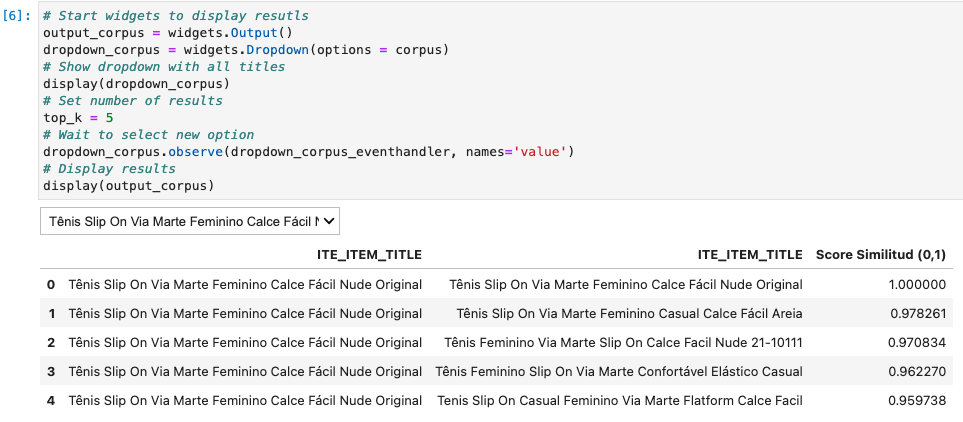